In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


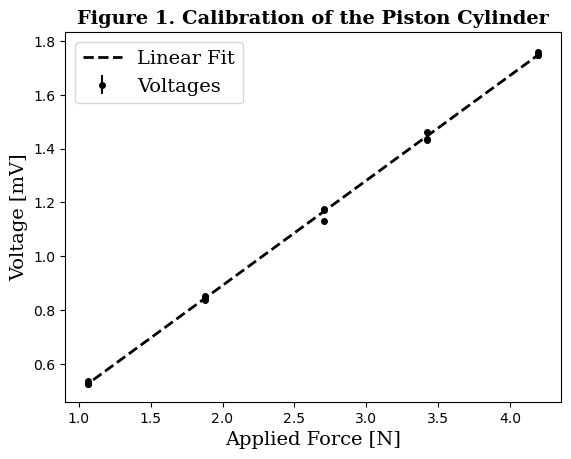

Sensor Coeff 0.3902348911413483 + 0.002953537838264836 mV / N
R squared: 0.9992558629284837


In [19]:
# Data paths
cm1 = [
    "./Data/calibration mass 1/trial1.csv",
    "./Data/calibration mass 1/trial2.csv",
    "./Data/calibration mass 1/trial3.csv",
]
cm2 = [
    "./Data/calibration mass 2/trial1.csv",
    "./Data/calibration mass 2/trial2.csv",
    "./Data/calibration mass 2/trial3.csv",
]
cm3 = [
    "./Data/calibration mass 3/trial1.csv",
    "./Data/calibration mass 3/trial2.csv",
    "./Data/calibration mass 3/trial3.csv",
]
cm4 = [
    "./Data/calibration mass 4/trial1.csv",
    "./Data/calibration mass 4/trial2.csv",
    "./Data/calibration mass 4/trial3.csv",
]
cm5 = [
    "./Data/calibration mass 5/trial1.csv",
    "./Data/calibration mass 5/trial2.csv",
    "./Data/calibration mass 5/trial3.csv",
]

# Load data
data_cal = [
    np.loadtxt(cm1[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm1[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm1[2], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm2[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm2[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm2[2], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm3[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm3[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm3[2], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm4[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm4[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm4[2], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm5[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm5[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm5[2], delimiter=",", skiprows=7, usecols=[2]),
]

# Area of Piston head
area = (np.pi / 4) * (32.5 / 1000) ** 2

# Total force applied on each trial
forces = (
    np.array(
        [
            35.06 + 73.372,
            35.06 + 73.372,
            35.06 + 73.372,
            35.06 + 73.372 + 82.953,
            35.06 + 73.372 + 82.953,
            35.06 + 73.372 + 82.953,
            35.06 + 73.372 + 82.953 + 84.155,
            35.06 + 73.372 + 82.953 + 84.155,
            35.06 + 73.372 + 82.953 + 84.155,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089 + 78.739,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089 + 78.739,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089 + 78.739,
        ]
    )
    * (1 / 1000)
    * 9.81
)

# Finding average and standard deviation for each trial
points = np.array([data_cal[i][2300:].mean() for i in range(len(data_cal))])
errors = np.array([(data_cal[i][2300:].std() * 2) for i in range(len(data_cal))])

# Linear regression
slope, intercept, rvalue, _, stderr = scipy.stats.linregress(forces, points)
force = np.linspace(1.1, 4.2, 1000)
curve_fit = slope * force + intercept


# Plotting
font = dict(family="serif", size=14)
title = dict(family="serif", size=14, weight="bold")
marker = dict(color="black", linestyle="none", marker=".", markersize=8)
line = dict(color="black", linestyle="--", linewidth=2)

plt.errorbar(forces, points, errors, label="Voltages", **marker)
plt.plot(force, curve_fit, label="Linear Fit", **line)
plt.xlabel("Applied Force [N]", **font)
plt.ylabel("Voltage [mV]", **font)
plt.title("Figure 1. Calibration of the Piston Cylinder", **title)
plt.legend(prop=font)
plt.show()

print(f"Sensor Coeff {slope} + {stderr} mV / N")
print(f"R squared: {rvalue ** 2}")


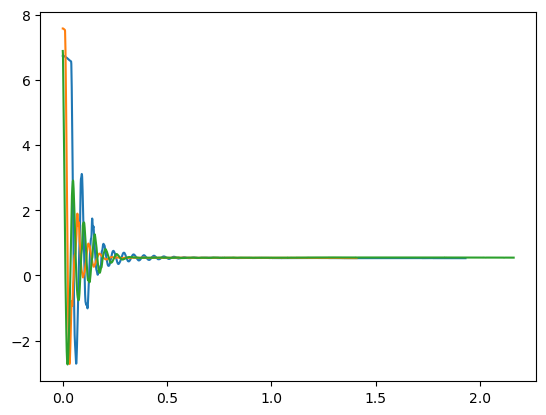

In [34]:
# Data paths
om1 = [
    "./Data/oscillation mass 1/trial1.csv",
    "./Data/oscillation mass 1/trial2.csv",
    "./Data/oscillation mass 1/trial3.csv",
]
om2 = [
    "./Data/oscillation mass 2/trial1.csv",
    "./Data/oscillation mass 2/trial2.csv",
    "./Data/oscillation mass 2/trial3.csv",
]
om3 = [
    "./Data/oscillation mass 3/trial1.csv",
    "./Data/oscillation mass 3/trial2.csv",
    "./Data/oscillation mass 3/trial3.csv",
]
omn = [
    "./Data/oscillation no mass/trial1.csv",
    "./Data/oscillation no mass/trial2.csv",
    "./Data/oscillation no mass/trial3.csv",
]


# Load data
data_osc = [
    test := np.loadtxt(om1[0], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om1[1], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om1[2], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om2[0], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om2[1], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om2[2], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om3[0], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om3[1], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om3[2], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(omn[0], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(omn[1], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(omn[2], delimiter=",", skiprows=7, usecols=[1,2]),
]


for data in data_osc[:3]:
    idx = data[:, 1].argmax()
    time_offset = data[idx, 0]
    plt.plot(data[idx:, 0] - time_offset, data[idx:, 1])

